In [1]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay

# NYC Boros
zippath = datasets.get_path('nybb')
polydf = read_file(zippath)

# Generate some circles
b = [int(x) for x in polydf.total_bounds]
N = 10
polydf2 = GeoDataFrame([
    {'geometry': Point(x, y).buffer(10000), 'value1': x + y, 'value2': x - y}
    for x, y in zip(range(b[0], b[2], int((b[2] - b[0]) / N)),
                    range(b[1], b[3], int((b[3] - b[1]) / N)))])


Bad key text.latex.preview in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

<AxesSubplot:>

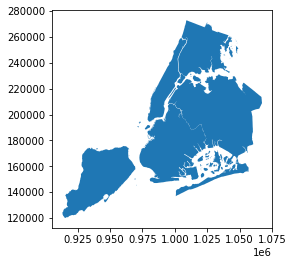

In [2]:
polydf.plot()


<AxesSubplot:>

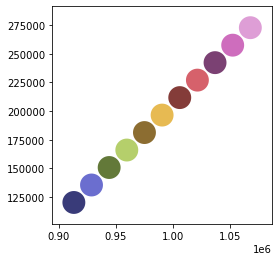

In [3]:
polydf2.plot(cmap='tab20b')


/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<AxesSubplot:>

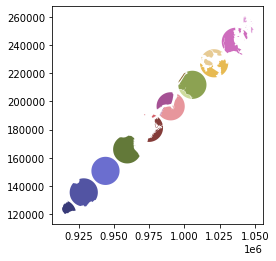

In [4]:
newdf = polydf.overlay(polydf2, how="intersection")
newdf.plot(cmap='tab20b')

In [5]:
polydf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [6]:
polydf2.head()

geometry   value1  value2
0  POLYGON ((923175.000 120121.000, 923126.847 11...  1033296  793054
1  POLYGON ((938595.000 135393.000, 938546.847 13...  1063988  793202
2  POLYGON ((954015.000 150665.000, 953966.847 14...  1094680  793350
3  POLYGON ((969435.000 165937.000, 969386.847 16...  1125372  793498
4  POLYGON ((984855.000 181209.000, 984806.847 18...  1156064  793646

In [7]:
newdf.head()

BoroCode       BoroName     Shape_Leng    Shape_Area   value1  value2  \
0         5  Staten Island  330470.010332  1.623820e+09  1033296  793054   
1         5  Staten Island  330470.010332  1.623820e+09  1063988  793202   
2         5  Staten Island  330470.010332  1.623820e+09  1094680  793350   
3         5  Staten Island  330470.010332  1.623820e+09  1125372  793498   
4         4         Queens  896344.047763  3.045213e+09  1217448  793942   

                                            geometry  
0  POLYGON ((922861.155 122515.103, 922832.456 12...  
1  POLYGON ((936924.598 129868.857, 936896.231 12...  
2  POLYGON ((953966.847 149684.829, 953822.853 14...  
3  POLYGON ((961460.942 175472.260, 961482.499 17...  
4  POLYGON ((1005319.370 201772.684, 1005317.989 ...

/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<AxesSubplot:>

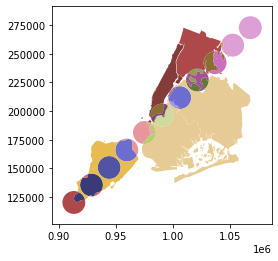

In [8]:
newdf = polydf.overlay(polydf2, how="union")
newdf.plot(cmap='tab20b')

/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<AxesSubplot:>

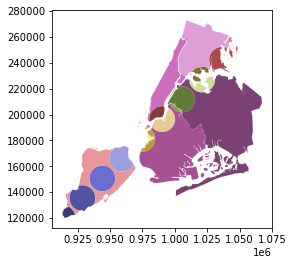

In [9]:
newdf = polydf.overlay(polydf2, how="identity")
newdf.plot(cmap='tab20b')

/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<AxesSubplot:>

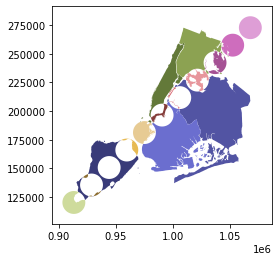

In [10]:
newdf = polydf.overlay(polydf2, how="symmetric_difference")
newdf.plot(cmap='tab20b')

/Users/danielkent/miniforge3/envs/cv/lib/python3.9/site-packages/geopandas/geodataframe.py:2196: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:2263
Right CRS: None

  return geopandas.overlay(


<AxesSubplot:>

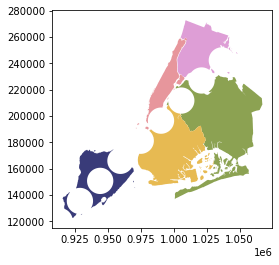

In [11]:
newdf = polydf.overlay(polydf2, how="difference")
newdf.plot(cmap='tab20b')